<a href="https://colab.research.google.com/github/MaggieWelch/labs/blob/main/MW_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it.

I used furniture


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests

header = {"User Agent":'MacBook-Air-3:~ maggiewelch$'}
url = 'https://charlottesville.craigslist.org/search/fua#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

2. Get your search results of interest and extract data from them, using code similar to what's below.


In [12]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [31]:
#chat assisted me with creating code as modifications I made to the example code kept producing the same posting 360 times, so not ideal
import re
import numpy as np

furniture_type = ['chair', 'bench', 'desk', 'cabinet', 'table', 'stool', 'shelf', 'dresser', 'frame', 'lamp', 'stand']
data = []
for k in range(len(listings)):
    title = listings[k].find('div', class_='title').get_text().lower()
    price = listings[k].find('div', class_='price').get_text()
    link = listings[k].find(href=True)['href']
    words = title.split()
    hits = [word for word in words if word in furniture_type]  # Finds furniture types in the title
    if len(hits) == 0:
        furniture_type_found = 'missing'
    else:
        furniture_type_found = hits[0]
    data.append({
        'title': title,
        'price': price,
        'link': link,
        'type': furniture_type_found,
    })



3. Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.


In [32]:
# Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
print(df.shape)
df.to_csv('craigslist_cville_furniture.csv') # Save data in case of a disaster
df.head()

(360, 4)


,title,price,link,type
0,red oak live edge bench,160,https://charlottesville.craigslist.org/fuo/d/c...,bench
1,great condition kitchen cabinet for sale $200 ...,200,https://charlottesville.craigslist.org/fuo/d/c...,cabinet
2,great condition chair $40 or best offer,40,https://charlottesville.craigslist.org/fuo/d/c...,chair
3,2pc desk,59,https://charlottesville.craigslist.org/fuo/d/b...,desk
4,ladies' round back chair,35,https://charlottesville.craigslist.org/fuo/d/c...,chair


In [33]:
#EDA
df.loc[:,['price','type']].groupby('type').describe()


price                                                              
         count        mean         std    min     25%    50%     75%     max
type                                                                        
bench      3.0  220.000000  158.745079  100.0  130.00  160.0  280.00   400.0
cabinet   14.0  135.000000  184.890820   20.0   20.00   62.5  187.50   700.0
chair     30.0   92.900000  142.972471   10.0   20.00   37.5   93.75   650.0
desk      22.0  137.000000  211.281126   10.0   20.00   39.5  175.00   750.0
dresser    8.0  214.125000  165.922906   25.0  122.50  164.5  305.50   497.0
frame     13.0   87.307692   97.438343   10.0   20.00   30.0  200.00   250.0
lamp       7.0   30.000000   19.866219    8.0   15.00   20.0   50.00    52.0
missing  197.0  266.583756  588.468567    0.0   30.00   80.0  275.00  5500.0
shelf      4.0   56.250000   33.509949   20.0   38.75   52.5   70.00   100.0
stand      6.0   51.666667   39.200340   20.0   20.00   35.0   87.50   100.0
stool      3.0   52.666667   37.287174   10.0   39.50   69.0   74.00    79.0
table     53.0  342.754717  991.154919    0.0   39.00   75.0  150.00  5000.0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'bench'),
  Text(1, 0, 'cabinet'),
  Text(2, 0, 'chair'),
  Text(3, 0, 'desk'),
  Text(4, 0, 'missing'),
  Text(5, 0, 'table'),
  Text(6, 0, 'stool'),
  Text(7, 0, 'frame'),
  Text(8, 0, 'shelf'),
  Text(9, 0, 'lamp'),
  Text(10, 0, 'stand'),
  Text(11, 0, 'dresser')])

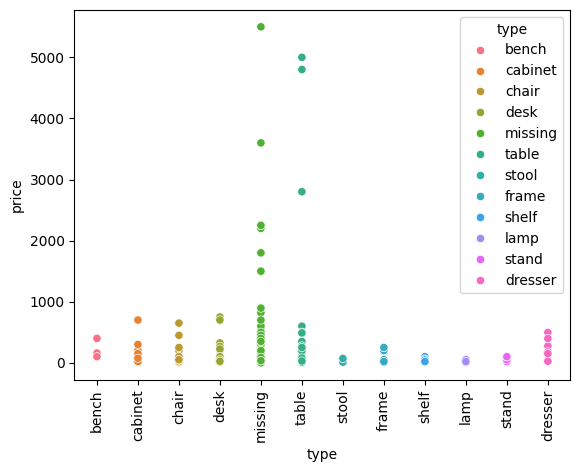

In [36]:
sns.scatterplot(data=df, x='type', y='price', hue='type')
plt.xticks(rotation=90)

The "missing" value skews the data and does not give insight into price differences dependent on furniture type. To explore my EDA, I want to remove this value so that the scale of the scatterplot improves. Chat assisted me with this conquest.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'bench'),
  Text(1, 0, 'cabinet'),
  Text(2, 0, 'chair'),
  Text(3, 0, 'desk'),
  Text(4, 0, 'table'),
  Text(5, 0, 'stool'),
  Text(6, 0, 'frame'),
  Text(7, 0, 'shelf'),
  Text(8, 0, 'lamp'),
  Text(9, 0, 'stand'),
  Text(10, 0, 'dresser')])

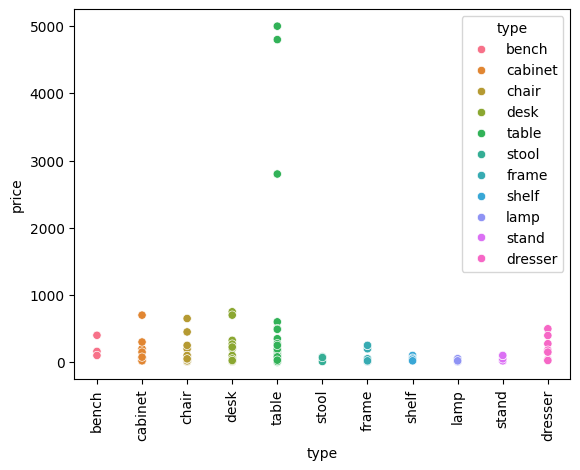

In [39]:
df_filtered = df[df['type'] != 'missing']
sns.scatterplot(data=df_filtered, x='type', y='price', hue='type')
plt.xticks(rotation=90)